In [1]:
import pandas as pd
import statsrat as sr
from statsrat.expr.predef.oc_renewal_iti import oc_renewal
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


occasion setting renewal (equal attention) 

0.003721091313729663
    schedule      trial_name u_name  mean_resp
0  different  cs1 -> nothing     us   0.508777
0       same  cs1 -> nothing     us   0.505055


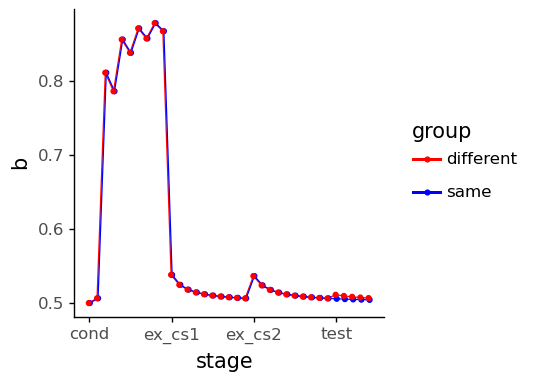

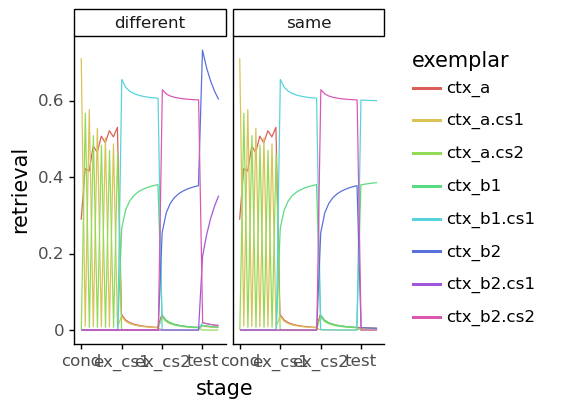

In [3]:
print('occasion setting renewal (equal attention) \n')

trials = oc_renewal.make_trials('different')
ds_diff = model.simulate(trials, par_vals[model.name])

trials = oc_renewal.make_trials('same')
ds_same = model.simulate(trials, par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_diff, ds_same],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True,
                       dodge_width = 1.5)
plot_b += scale_color_manual(values = {'different': 'red', 'same': 'blue'})
plot_b.draw()
    
plot_r = sr.multi_plot(ds_list = [ds_diff, ds_same],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       only_main = True)
plot_r += ylab('retrieval')
plot_r.draw()

print(oc_renewal.oats['renewal'].compute_total({'different': ds_diff, 'same': ds_same}))
print(oc_renewal.oats['renewal'].mean_resp({'different': ds_diff, 'same': ds_same}))

occasion setting renewal 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_oc_renewal_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_oc_renewal_r_null.jpeg


0.04369111619756205
    schedule      trial_name u_name  mean_resp
0  different  cs1 -> nothing     us   0.709792
0       same  cs1 -> nothing     us   0.666101


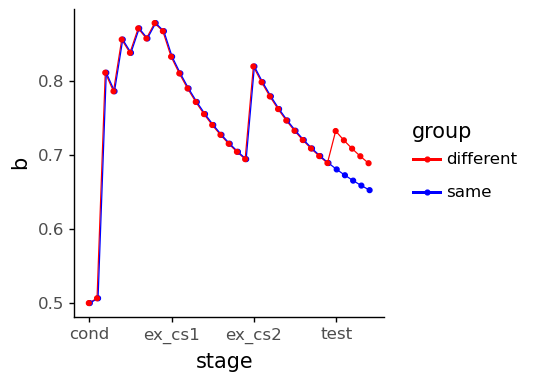

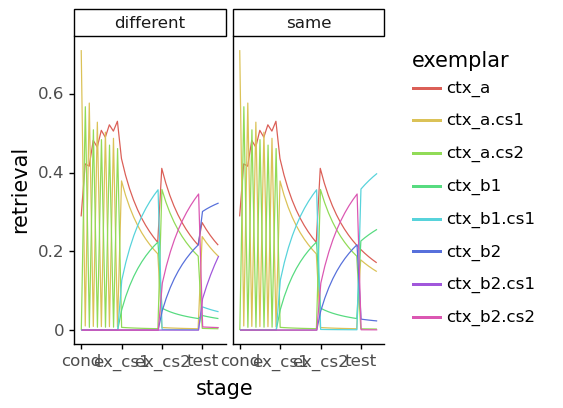

In [4]:
print('occasion setting renewal \n')

atn_hi = 1.0

trials = oc_renewal.make_trials('different')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn[['cs1', 'cs2']] = atn_hi
init_atn.loc[['ctx_b1', 'ctx_b1.cs1'], 'ctx_b1'] = atn_hi
init_atn.loc[['ctx_b2', 'ctx_b2.cs2'], 'ctx_b2'] = atn_hi
ds_diff = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = oc_renewal.make_trials('same')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn[['cs1', 'cs2']] = atn_hi
init_atn.loc[['ctx_b1', 'ctx_b1.cs1'], 'ctx_b1'] = atn_hi
init_atn.loc[['ctx_b2', 'ctx_b2.cs2'], 'ctx_b2'] = atn_hi
ds_same = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_diff, ds_same],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True, 
                       dodge_width = 1.5)
plot_b += scale_color_manual(values = {'different': 'red', 'same': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_oc_renewal_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_diff, ds_same],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       only_main = True)
plot_r += ylab('retrieval')
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_oc_renewal_r_' + model.name + '.jpeg', dpi = 500)

print(oc_renewal.oats['renewal'].compute_total({'different': ds_diff, 'same': ds_same}))
print(oc_renewal.oats['renewal'].mean_resp({'different': ds_diff, 'same': ds_same}))